**imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis - Quantitative
* Load
* Validate Data
* Data Summary - Shape, Columns, Types
* Check Missing Values
* Know Features and Target
* Format column Names - If required
* Univariate Analysis
    * 5 Number Summary
    * Check Continuous Distributions - Histogram, Distplot, STD
    * Check Discrete Distributions - countplot
    * Check Outliers - BoxPlot, ViolinPlot
* Multivariate Analysis
    * Features vs Target Scatter plot
    * Correlation Analysis - HeatMap

**Loading...**

In [2]:
df = pd.read_csv("D:\\uber-taxi-demand\\data\\yellow_tripdata_2022.csv")

In [3]:
df.head().T

,0,1,2,3,4
tpep_pickup_datetime,2022-01-01 00:00:00,2022-01-01 01:00:00,2022-01-01 02:00:00,2022-01-01 03:00:00,2022-01-01 04:00:00
passenger_count,6838,7738,5974,4107,2485
VendorID,4261,4997,3901,2686,1651


In [4]:
df.tail().T

,21619,21620,21621,21622,21623
tpep_pickup_datetime,2022-12-31 19:00:00,2022-12-31 20:00:00,2022-12-31 21:00:00,2022-12-31 22:00:00,2022-12-31 23:00:00
passenger_count,8584,9419,9081,6732,4873
VendorID,5730,6210,5962,4350,3273


In [40]:
### laoded successfully - Set pickup date time as index and rename VendorID to hourly_rides

# Basic Exploratory Data Analysis

## Data Summary - Shape, Columns, Types

In [5]:
df.shape

(21624, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21624 entries, 0 to 21623
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tpep_pickup_datetime  21624 non-null  object
 1   passenger_count       21624 non-null  int64 
 2   VendorID              21624 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 506.9+ KB


In [7]:
df.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'VendorID'], dtype='object')

In [8]:
### Structre and type looks fine - 'tpep_pickup_datetime' needs to be formatted as pd.TimeStamp

## Check Missing Values

In [9]:
df.isnull().sum()

tpep_pickup_datetime    0
passenger_count         0
VendorID                0
dtype: int64

In [10]:
### There are no missing values

## Features

In [11]:
df.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'VendorID'], dtype='object')

In [12]:
df.head()

,tpep_pickup_datetime,passenger_count,VendorID
0,2022-01-01 00:00:00,6838,4261
1,2022-01-01 01:00:00,7738,4997
2,2022-01-01 02:00:00,5974,3901
3,2022-01-01 03:00:00,4107,2686
4,2022-01-01 04:00:00,2485,1651


## Targets

In [13]:
### we have to generate hourly demand of taxi drivers by aggregating counts per hour

In [14]:
df.loc[:5, ['passenger_count', 'VendorID']]

,passenger_count,VendorID
0,6838,4261
1,7738,4997
2,5974,3901
3,4107,2686
4,2485,1651
5,1215,827


## Format Column Names

In [15]:
### column names need to be renamed

# Univariate EDA

### summary stats

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,21624.0,2549.636469,3826.748604,0.0,0.0,0.0,5685.00,14770.0
VendorID,21624.0,1833.866907,2745.905504,0.0,0.0,0.0,4103.25,10527.0


### distributions

In [17]:
df.select_dtypes(['int64']).columns

Index(['passenger_count', 'VendorID'], dtype='object')

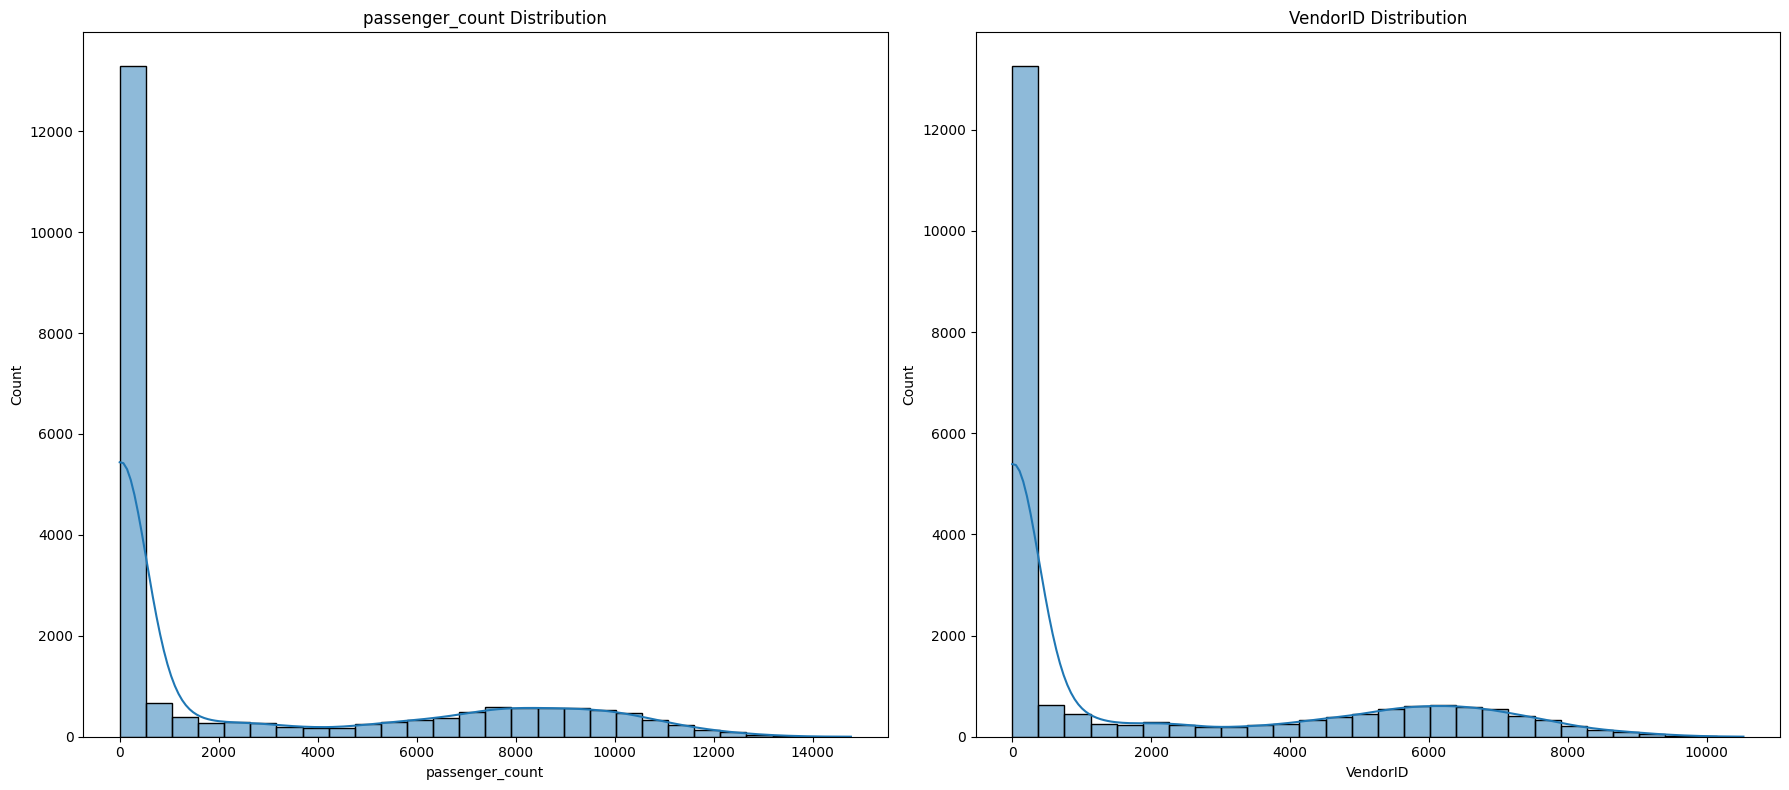

In [19]:
# Continuous Feature distribution
cols = list(df.select_dtypes(['int64']).columns)
fig, grid = plt.subplots(1, 2, figsize=(18, 8))
colId = 0

for row in range(1):
    for col in range(2):
        feature = cols[colId]
        sns.histplot(data=df, ax=grid[col], x=feature, label=feature, bins=28, kde=True)
        grid[col].set_title(f'{feature} Distribution')
        colId += 1
plt.tight_layout()
plt.show()

### Outliers

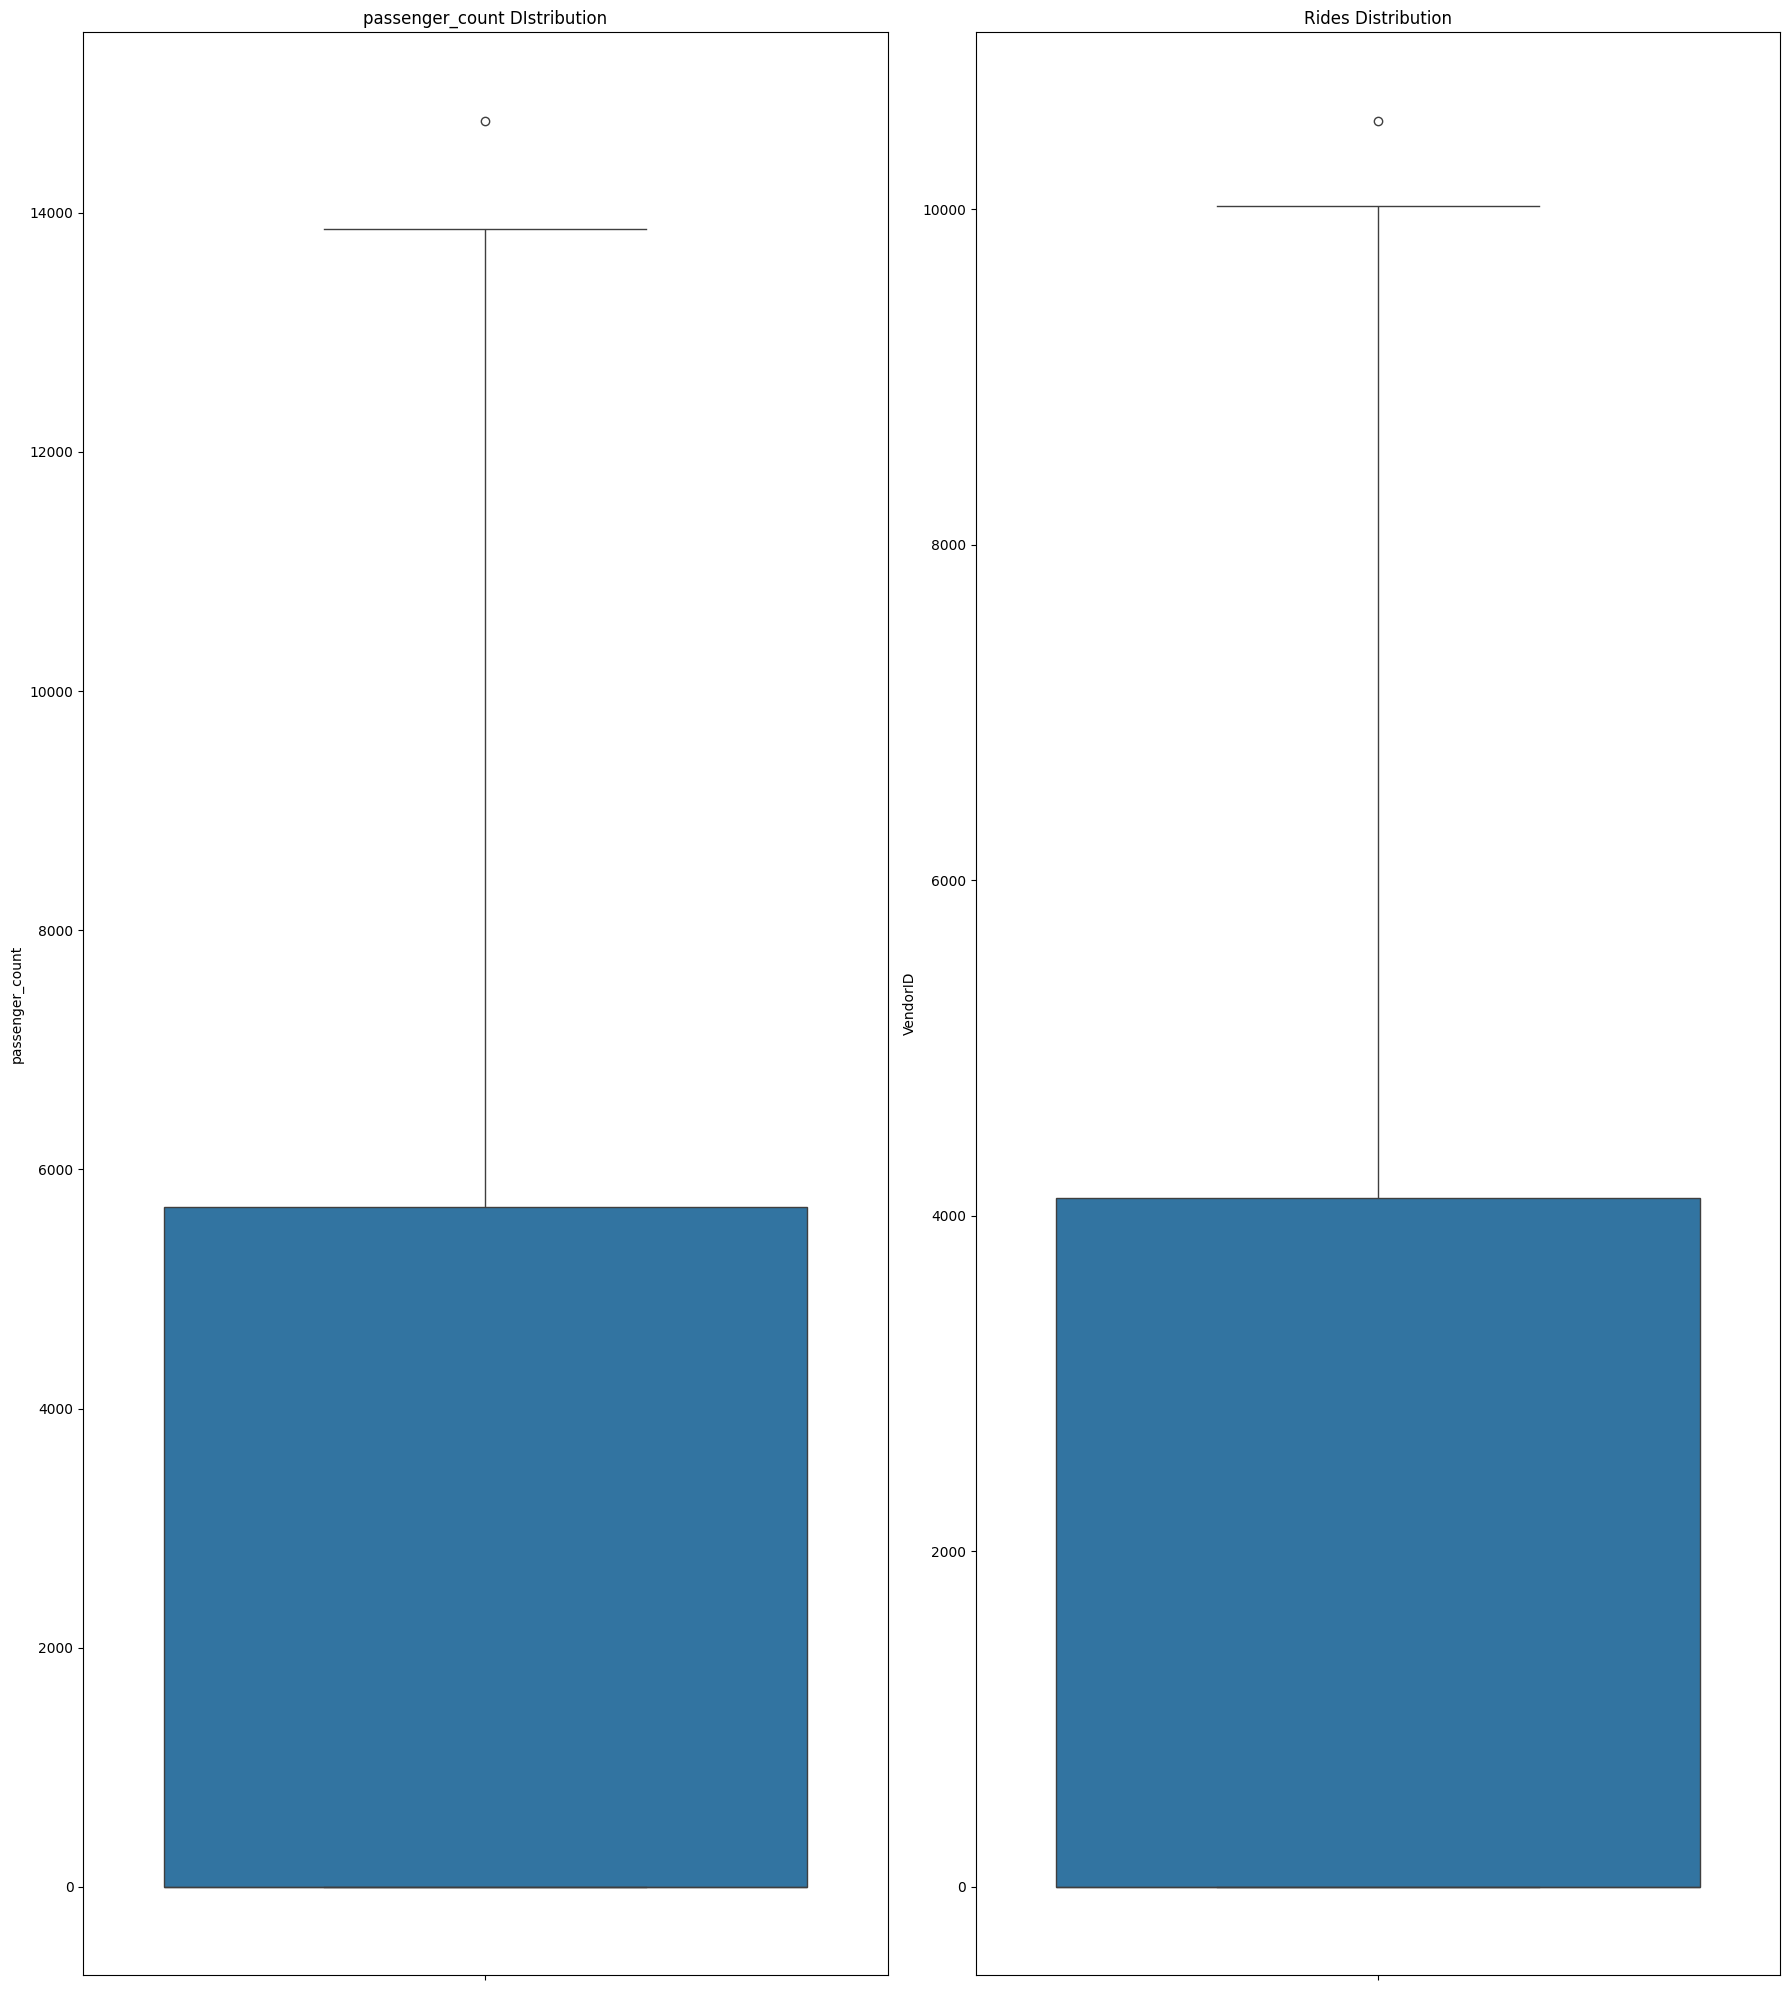

In [68]:
fig, grid = plt.subplots(1, 2, figsize=(18, 20))
sns.boxplot(data=df, ax=grid[0], y='passenger_count')
grid[0].set_title(f'passenger_count DIstribution')
sns.boxplot(data=df, ax=grid[1], y='VendorID')
grid[1].set_title(f'Rides Distribution')
plt.tight_layout()
plt.show()

In [ ]:
### we have negelegible outliers on data, but still analysis is required to know the effect